In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Load customer demographics and claims information into separate dataframes:
- customer demographics should be loaded into `cust_df` from 'cust_demographics.csv'
- claims should be loaded into `claims_df` from 'claims.csv'

In [212]:
claims_df = pd.read_csv('claims.csv')
cust_df = pd.read_csv('cust_demographics.csv')

2. Inspect the DataFrames to get an understanding of the data, dtypes, and column structure

First, we'll inspect the heads.

In [213]:
claims_df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1,No


In [214]:
cust_df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


Then let's check out the dtypes and NaNs with the .info() method.

In [215]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1087 non-null   int64 
 1   gender       1087 non-null   object
 2   DateOfBirth  1087 non-null   object
 3   State        1087 non-null   object
 4   Contact      1087 non-null   object
 5   Segment      1087 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.1+ KB


In [216]:
claims_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   claim_id             1104 non-null   int64 
 1   customer_id          1104 non-null   int64 
 2   incident_cause       1104 non-null   object
 3   claim_date           1104 non-null   object
 4   claim_area           1104 non-null   object
 5   police_report        1104 non-null   object
 6   claim_type           1104 non-null   object
 7   claim_amount         1100 non-null   object
 8   total_policy_claims  1104 non-null   int64 
 9   fraudulent           1104 non-null   object
dtypes: int64(3), object(7)
memory usage: 86.4+ KB


3. Check for duplicates and then remove them:

Getting number of duplicates:

In [217]:
print("There are " + str(cust_df.duplicated().sum()) + " duplicates in the customer demographic DataFrame.")
print("There are " + str(claims_df.duplicated().sum()) + " duplicates in the claims DataFrame.")

There are 2 duplicates in the customer demographic DataFrame.
There are 4 duplicates in the claims DataFrame.


Deduplication: removing duplicates.

In [218]:
claims_df = claims_df.drop_duplicates()
cust_df = cust_df.drop_duplicates()

print("There are now " + str(cust_df.duplicated().sum()) + " duplicates in the customer demographic DataFrame.")
print("There are now " + str(claims_df.duplicated().sum()) + " duplicates in the claims DataFrame.")

There are now 0 duplicates in the customer demographic DataFrame.
There are now 0 duplicates in the claims DataFrame.


4. Join the dataframes and save to a dataframe `combined_df`. Identify what column(s) you will join on and then use an inner join. Drop any redundant columns resulting from merge:

In [219]:
combined_df = pd.merge(claims_df, cust_df, left_on = 'customer_id', right_on = 'CUST_ID', how = 'inner')
combined_df.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [220]:
# dropping redundat key:
combined_df = combined_df.drop(columns = ['CUST_ID'])
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   claim_id             1085 non-null   int64 
 1   customer_id          1085 non-null   int64 
 2   incident_cause       1085 non-null   object
 3   claim_date           1085 non-null   object
 4   claim_area           1085 non-null   object
 5   police_report        1085 non-null   object
 6   claim_type           1085 non-null   object
 7   claim_amount         1081 non-null   object
 8   total_policy_claims  1085 non-null   int64 
 9   fraudulent           1085 non-null   object
 10  gender               1085 non-null   object
 11  DateOfBirth          1085 non-null   object
 12  State                1085 non-null   object
 13  Contact              1085 non-null   object
 14  Segment              1085 non-null   object
dtypes: int64(3), object(12)
memory usage: 127.3+ KB


5. Identify cleaning tasks in the `claim_amount` column and execute them:

The claim amount column is an `object` dtype (in this case, a string):

In [221]:
combined_df['claim_amount'].head()

0      $2980
1      $2980
2    $3369.5
3      $1680
4      $2680
Name: claim_amount, dtype: object

We need to get rid of the '$' signs and then convert to floats.

In [222]:
combined_df['claim_amount'] = combined_df['claim_amount'].str.replace('$', '').astype('float')
combined_df['claim_amount'].head(4)

0    2980.0
1    2980.0
2    3369.5
3    1680.0
Name: claim_amount, dtype: float64

The .info() method showed some NaNs. There are only 4 so let's just drop these:

In [223]:
combined_df = combined_df.dropna(subset=['claim_amount'])
combined_df.info

<class 'pandas.core.frame.DataFrame'>
Index: 1081 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1081 non-null   int64  
 1   customer_id          1081 non-null   int64  
 2   incident_cause       1081 non-null   object 
 3   claim_date           1081 non-null   object 
 4   claim_area           1081 non-null   object 
 5   police_report        1081 non-null   object 
 6   claim_type           1081 non-null   object 
 7   claim_amount         1081 non-null   float64
 8   total_policy_claims  1081 non-null   int64  
 9   fraudulent           1081 non-null   object 
 10  gender               1081 non-null   object 
 11  DateOfBirth          1081 non-null   object 
 12  State                1081 non-null   object 
 13  Contact              1081 non-null   object 
 14  Segment              1081 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory 

6. Clean fradulent and convert to appropriate numeric values:

In [278]:
# your code here

# check category value counts
print(combined_df['fraudulent'].value_counts())

# create boolean and convert to binary integer encoding
combined_df['fraudulent'] = (combined_df['fraudulent'] == 'Yes').astype('int')

fraudulent
No     834
Yes    247
Name: count, dtype: int64


In [299]:
cause_dependence = combined_df.groupby('incident_cause')[['claim_amount', 'fraudulent']].mean(numeric_only=True)
cause_dependence

,claim_amount,fraudulent
incident_cause,,
Crime,6546.564815,0.240741
Driver error,13756.873077,0.226923
Natural causes,7308.886486,0.210811
Other causes,14570.896491,0.249123
Other driver error,14720.043210,0.213992


7. Use an appropriate plot to visualize the the mean claim amount for each incidence cause:

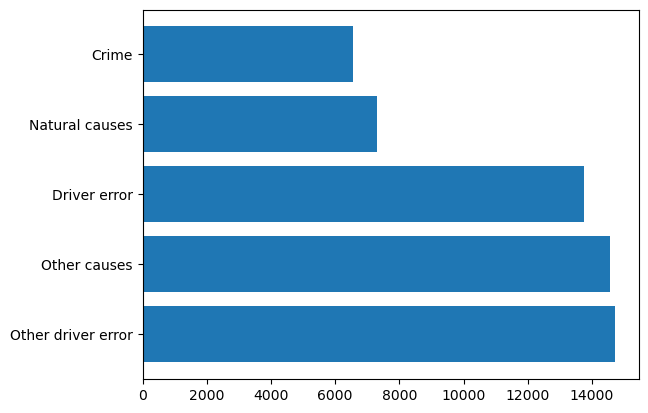

In [137]:
# A bar chart will work here
clm_amount = cause_dependence['claim_amount'].sort_values(ascending=False)
fig, ax = plt.subplots()
ax.barh(y = clm_amount.index, width=clm_amount.values)
plt.show()

Crime and natural causes have significantly lower claim amounts than the other sources. Driver error, other causes, and other driver error hover around the same for mean claim amount and are significantly higher than for crime and natural causes.

8. Plot the distribution of claim amounts: use a histogram.

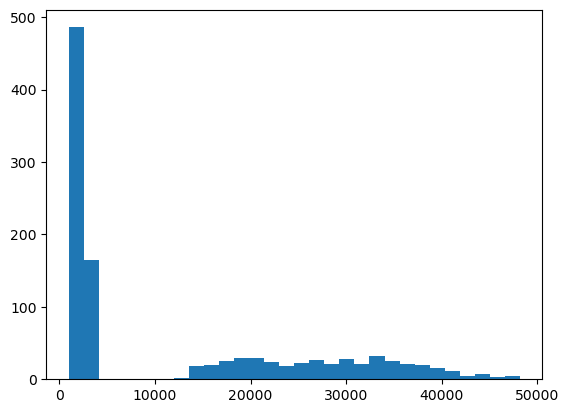

In [305]:
plt.hist(combined_df['claim_amount'], bins = 30)
plt.show()

9. There is a bimodal distribution here. Create a binary column called "claim_size" that is "large" when the claim amount is greater than or equal to 10000 and "small" otherwise. We will use this binary categorical later.

In [309]:
combined_df["claim_size"] = (combined_df['claim_amount'] >= 10000).map({True: "large", False: "small"})
combined_df["claim_size"].head()

0    small
1    small
2    small
3    small
4    small
Name: claim_size, dtype: object

10. Investigate the fraudulent claim rate by state:
- get the rate of fraudulent claims by state sorted in descending order. Save this to a Series `sorted_rates`
- get the states with the top 15 fraudulent claim rates.

In [312]:
sorted_rates = combined_df.groupby('State')['fraudulent'].mean(numeric_only=True).sort_values(ascending=False)
state_names = sorted_rates[0:15].index #  states with top 10 fraud rates
print(sorted_rates[0:15])
state_names

State
TN    0.555556
KY    0.428571
MT    0.400000
NM    0.368421
OR    0.357143
CA    0.352941
WI    0.347826
DE    0.344828
ID    0.333333
MI    0.333333
TX    0.318182
WV    0.300000
WY    0.294118
AL    0.285714
MA    0.269231
Name: fraudulent, dtype: float64


Index(['TN', 'KY', 'MT', 'NM', 'OR', 'CA', 'WI', 'DE', 'ID', 'MI', 'TX', 'WV',
       'WY', 'AL', 'MA'],
      dtype='object', name='State')

There is a substantial difference between the fraudulent claim rate in the various states.

11. It would be interesting to see whether there is a differentiation of fraud rates by claim size in each state. First compute this by using a pivot table. Display results from the states with the top 15 highest fraudulent claim rates.


In [334]:
# your code here

widestateclaims = combined_df.pivot_table(index = 'State', columns = 'claim_size', values='fraudulent')
widestateclaims.loc[state_names]

claim_size,large,small
State,,
TN,0.444444,0.611111
KY,0.333333,0.454545
MT,0.416667,0.375000
NM,0.333333,0.400000
OR,0.200000,0.444444
CA,0.375000,0.333333
WI,0.300000,0.384615
DE,0.333333,0.352941
ID,0.400000,0.294118


There do seem to be some differences between each claim size bracket for each state. However, whether the fraud rate is higher or lower for large claims vs small claims seems to depend on the state. Furthermore, Whether many of these differences are statistically significant will merit further investigation and some more rigorous statistical testing.

12. Conduct a groupby/aggregation(s) by State and claim size. This time you will compute the fraudulent claim rate as well as the number of examples in each category and subcategory. The result should be presented in a single DataFrame.

*Hint*: you can compute each aggregation separately and then concatenate **or** you can look up how to perform multiple aggregations with the .agg() method.

In [322]:
# one solution
groupedstateclaims_mean = combined_df.groupby(['State','claim_size'])["fraudulent"].mean().rename('fraud_rate')
groupedstateclaims_count = combined_df.groupby(['State','claim_size'])["fraudulent"].count().rename('count')

groupedstateclaims = pd.concat([groupedstateclaims_mean, groupedstateclaims_count], axis = 1)
groupedstateclaims.head()

fraud_rate  count
State claim_size                   
AK    large         0.333333      9
      small         0.181818     11
AL    large         0.363636     11
      small         0.235294     17
AR    large         0.111111      9

In [315]:
# another solution

# your code here

groupedstateclaims = combined_df.groupby(['State','claim_size'])["fraudulent"].agg(['mean', 'count'])
groupedstateclaims.head()

mean  count
State claim_size                 
AK    large       0.333333      9
      small       0.181818     11
AL    large       0.363636     11
      small       0.235294     17
AR    large       0.111111      9

There are not too many examples within each subgroup -- but it is plausible that there are enough here to differentiate between fraud behavior for small and large claims in many of the states. 


13. Plot fraudulent rates amongst small and large claim sizes in the 15 states with the top average fraudulent rates:
- put this in a single bar chart with large and small claim sizes overlayed on top of each other
- use blue for large claim and orange for small claim, set transparency parameter to 0.4.
- make sure that you label plots appropriately and display legends.

*Hint*: selecting the appropriate column and unstacking the results of your groubpy on State and claim size might be helpful here

In [342]:
# unstacking

claims_fraud_state = groupedstateclaims.loc[state_names,'fraud_rate'].unstack()
claims_fraud_state.head()

claim_size,large,small
State,,
TN,0.444444,0.611111
KY,0.333333,0.454545
MT,0.416667,0.375000
NM,0.333333,0.400000
OR,0.200000,0.444444


claim_size,large,small
State,,
TN,0.444444,0.611111
KY,0.333333,0.454545
MT,0.416667,0.375000
NM,0.333333,0.400000
OR,0.200000,0.444444
CA,0.375000,0.333333
WI,0.300000,0.384615
DE,0.333333,0.352941
ID,0.400000,0.294118


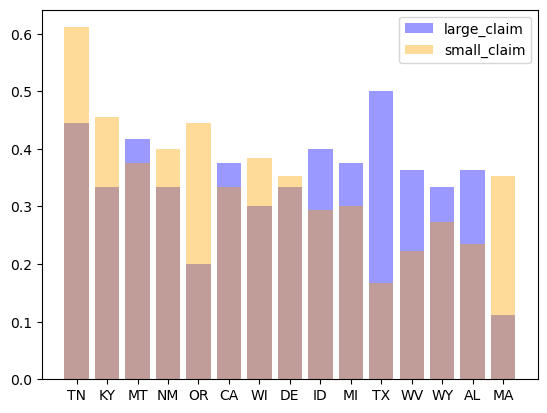

In [359]:
#making  the plot

fig, ax = plt.subplots()
ax.bar(x = claims_fraud_state.index, height = claims_fraud_state['large'], color ='b', alpha = 0.4, label = 'large_claim')
ax.bar(x = claims_fraud_state.index, height = claims_fraud_state['small'], color ='orange', alpha = 0.4, label = 'small_claim')
ax.legend()
claims_fraud_state

14. Just because its a lot of fun and good for you, melt the pivot table with average fraudulent rates (pivoted on State and claim size) for the states with top 15 highest overall fradulent rates. We have recalculated the table that is to be melted below from `combined_df` and have stored it in `widestateclaims`:
- make sure that the index is still State (look up what option for melt you need)
- the value should be named 'fraud_rate'
- save to `melted_claims`

In [369]:
widestateclaims = combined_df.pivot_table(index = 'State', columns = 'claim_size', values='fraudulent').loc[state_names]
widestateclaims

claim_size,large,small
State,,
TN,0.444444,0.611111
KY,0.333333,0.454545
MT,0.416667,0.375000
NM,0.333333,0.400000
OR,0.200000,0.444444
CA,0.375000,0.333333
WI,0.300000,0.384615
DE,0.333333,0.352941
ID,0.400000,0.294118


In [377]:
# your code here

melted_claims = pd.melt(widestateclaims, value_vars=['small', 'large'], value_name='fraud_rate', ignore_index=False)
melted_claims.head()

,claim_size,fraud_rate
State,,
TN,small,0.611111
KY,small,0.454545
MT,small,0.375000
NM,small,0.400000
OR,small,0.444444


15. [optional] There are a lot of other aspects of the data that we have not touched. In particular, it might be interesting to look at how claimant age and gender influence claim behavior. You could also take a look at incident cause and whether a police report was filed or not in seeing how fraudulent claims and claim size are influenced by these two categorical classes. Knock yourself out and use your reshaping and visualization skills to explore.